In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
rd = pd.read_csv("C:\\Users\\shree\\Downloads\\1.04.+Real-life+example.csv")
rd.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
rd.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Model would require 312 unique dummies, so lets drop it

In [4]:
d = rd.drop(['Model'], axis=1)
d.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Mileage and EngineV have some null values lets deal with them

In [5]:
d.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### Thats less than 5% of data so lets drop these rows (Rule of Thumb)

In [6]:
d_no_mv = d.dropna(axis=0)
d_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


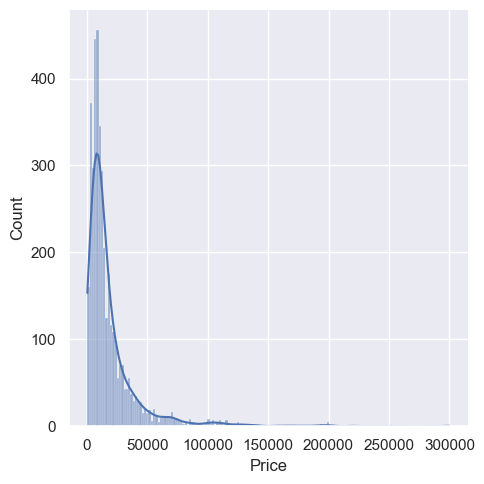

In [7]:
sns.displot(d_no_mv['Price'],kde=True)

#### Outliers could affect the regression line
So lets remove top 1% of observations

In [8]:
q = d_no_mv['Price'].quantile(0.99)
d_1 = d_no_mv[d_no_mv['Price']<q]
d_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


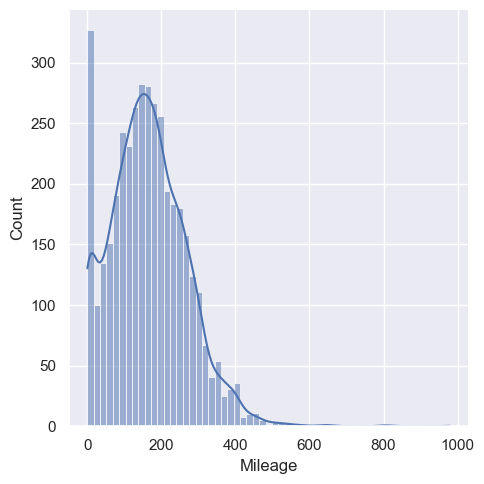

In [9]:
sns.displot(d_1['Mileage'],kde=True)

In [10]:
q = d_1['Mileage'].quantile(0.99)
d_2 = d_1[d_1['Mileage']<q]
d_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


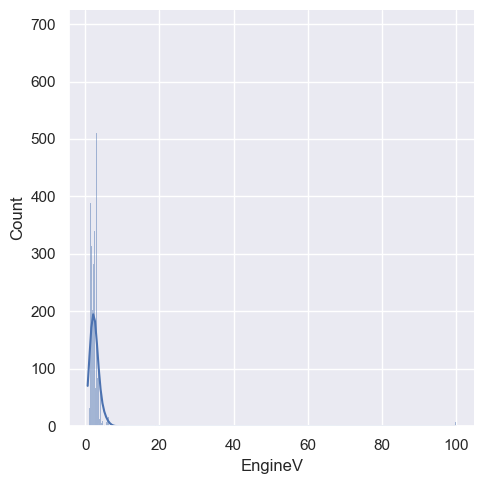

In [11]:
sns.displot(d_1['EngineV'],kde=True)

#### This is strange, values go upto 100 for EngineV. Seems unusual values
#### In automobiles, according to wikipedia engine volumes range from 0.6 to 8 litres

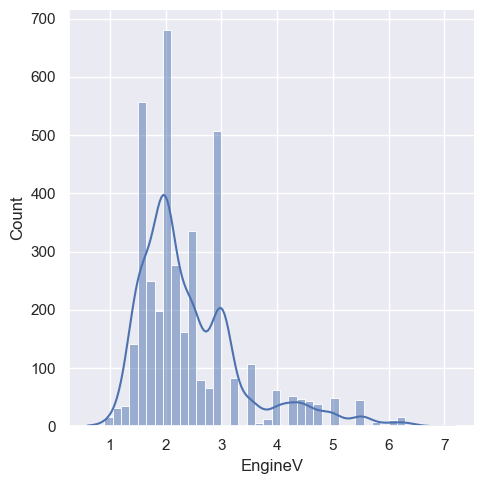

In [12]:
d_3 = d_2[d_2['EngineV']<8.0]
sns.displot(d_3['EngineV'],kde=True)

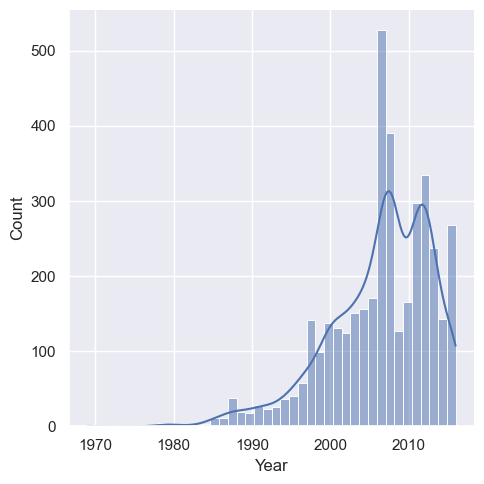

In [13]:
sns.displot(d_3['Year'],kde=True)

#### The reason outliers are to the left (old cars) is they are be vintage cars
#### lets handle them by removing bottom 1% observations

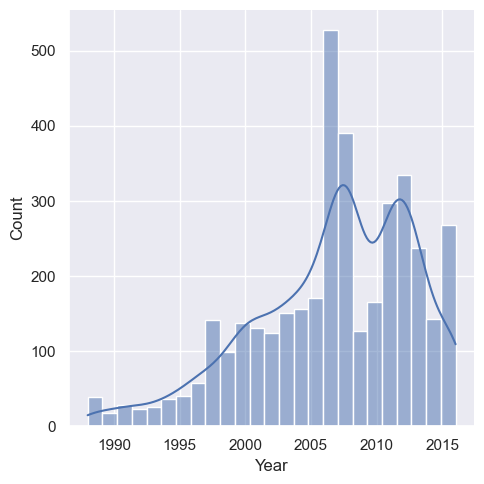

In [14]:
q = d_3['Year'].quantile(0.01)
d_4 = d_3[d_3['Year']>q]
sns.displot(d_4['Year'],kde=True)

In [15]:
cd = d_4.reset_index(drop=True)
cd.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3869,3869.000000,3869,3869.000000,3869.000000,3869,3869,3869.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1469,NaN,NaN,1807,3507,NaN
mean,NaN,18196.862267,NaN,160.532437,2.452714,NaN,NaN,2006.711295
std,NaN,19083.381768,NaN,95.610571,0.954409,NaN,NaN,6.102717
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Lets Check OLS assumptions

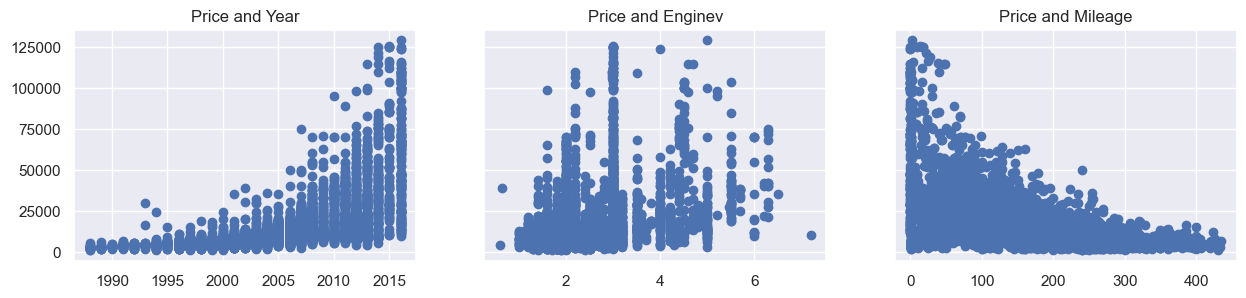

In [16]:
# Checking for Linearity
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3)) 
ax1.scatter(cd['Year'],cd['Price']) 
ax1.set_title('Price and Year')
ax2.scatter(cd['EngineV'],cd['Price']) 
ax2.set_title('Price and Enginev') 
ax3.scatter(cd['Mileage'],cd['Price']) 
ax3.set_title('Price and Mileage')
plt.show()

No Linear patterns visible

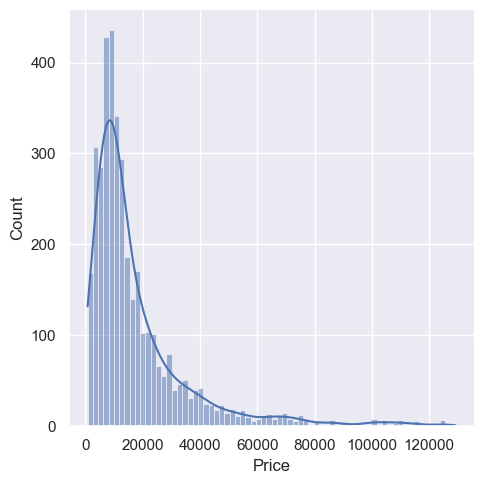

In [17]:
sns.displot(cd['Price'],kde=True)

Price is not normally distrubuted, Patterns are quite exponential

So, we will apply log transformation

In [18]:
log_price = np.log(cd['Price'])
cd['log_price'] = log_price

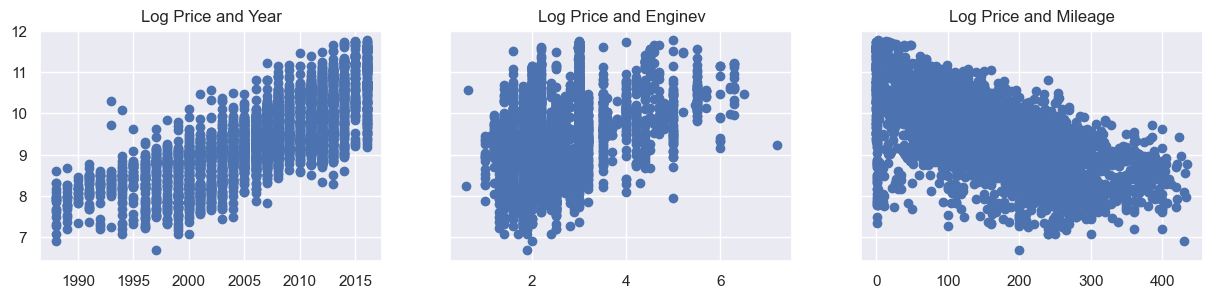

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3)) 
ax1.scatter(cd['Year'],cd['log_price']) 
ax1.set_title('Log Price and Year')
ax2.scatter(cd['EngineV'],cd['log_price']) 
ax2.set_title('Log Price and Enginev') 
ax3.scatter(cd['Mileage'],cd['log_price']) 
ax3.set_title('Log Price and Mileage')
plt.show()

We can see a linear pattern now, lines would fit the data much better

In [20]:
cd = cd.drop(['Price'], axis=1)

### Checking for Normality and Homoscedasticity
#### - Normality holds (assumed for big samples)
#### - Zero Mean 
#### - Homoscedasticity hold (we applied log transformation)

### Autocorrelation
#### - Not time series or panel data , we have snapshot data



In [21]:
# Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cd[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [22]:
vif

,VIF,features
0,3.792512,Mileage
1,10.303342,Year
2,7.604155,EngineV


#### VIF = 1 , no multi collinearity
#### 1< VIF < 5 , perfectly okay
#### VIF > 5 or 6 (not fixed) , too collinear

In [23]:
cd_no_mColl = cd.drop(['Year'], axis = 1)  # removed year as VIF too high

### Lets create dummies for categorical data

In [24]:
d_dummies = pd.get_dummies(cd_no_mColl, drop_first=True)
d_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearraange a bit

In [25]:
d_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [26]:
cols = [
    'log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'
]

In [27]:
d_prep = d_dummies[cols]
d_prep.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [28]:
targets = d_prep['log_price']
inputs = d_prep.drop(['log_price'], axis=1)

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(inputs)

StandardScaler()

In [31]:
inputs_scaled = scaler.transform(inputs)

#### Train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
 x_train,x_test,y_train, y_test = train_test_split(inputs_scaled, targets,test_size = 0.2, random_state = 365)

#### Regression

In [34]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_hat = reg.predict(x_train)

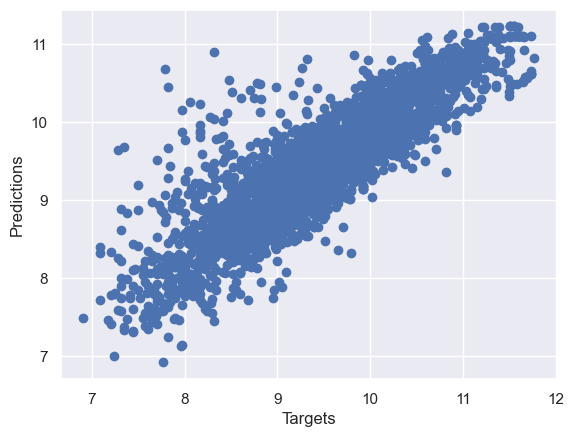

In [36]:
# Targets vs predictions
plt.scatter(y_train, y_hat)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

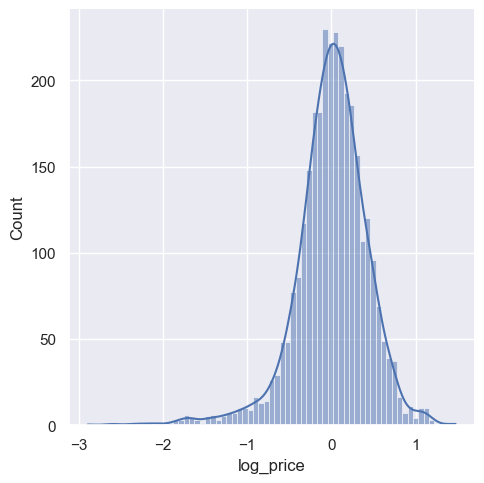

In [37]:
# Residuals PDF

sns.displot(y_train-y_hat, kde=True)

Errors seem normally distributed
Mean seems like 0

much longer tail on negative side than positive : so there are few obs. for which ytrain-yhat are much lower than the mean
which means the model is overestimating much higher price than observed

Judging by the right side, the model rarely underpredicts than the target

In [38]:
reg.score(x_train,y_train)

0.7533543628226405

In [39]:
reg.intercept_

np.float64(9.420257598685335)

In [40]:
reg.coef_

array([-0.45276044,  0.20943387,  0.01501554,  0.01305146, -0.13744662,
       -0.17943798, -0.05947446, -0.08727396, -0.15088772, -0.1005177 ,
       -0.19964061, -0.12348786, -0.16041233, -0.12294126, -0.03230917,
       -0.14969743,  0.3199948 ])

In [41]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.452760
1,EngineV,0.209434
2,Brand_BMW,0.015016
3,Brand_Mercedes-Benz,0.013051
4,Brand_Mitsubishi,-0.137447
5,Brand_Renault,-0.179438
6,Brand_Toyota,-0.059474
7,Brand_Volkswagen,-0.087274
8,Body_hatch,-0.150888
9,Body_other,-0.100518


Weights interpretation
I. Continuous variables:
1. A positive weight shows that as > feature increases .c value, so do the log_price, and 'Price' respectively
2. A negative weight shows that as a feature increases .S value, log_price and 'Price' decrease

II. Dummy variables:
1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi)
2. A negative weight shows that the respective category Brand) is less expensive than the benchmark (Audi)

### Testing

In [42]:
y_hat_test = reg.predict(x_test) 

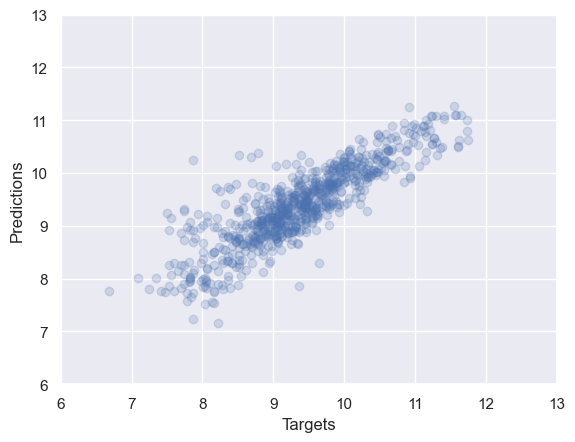

In [43]:
# test Targets vs predictions
plt.scatter(y_test, y_hat_test, alpha =0.2)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [44]:
df_pf =  pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,27706.597190
1,11796.409977
2,7547.581839
3,39677.787946
4,11802.736041


In [45]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,27706.597190,NaN
1,11796.409977,7900.0
2,7547.581839,NaN
3,39677.787946,NaN
4,11802.736041,NaN
...,...,...
769,17486.257099,6950.0
770,13981.444078,NaN
771,15956.006583,NaN
772,8159.466097,NaN


In [46]:
y_test

2264     9.994242
1474     9.740910
2351     7.824046
3579    10.968198
2595     9.210340
          ...    
1968    10.146434
2129     9.495519
1252     9.581904
3652     8.556414
1370     7.824046
Name: log_price, Length: 774, dtype: float64

In [47]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.994242
1     9.740910
2     7.824046
3    10.968198
4     9.210340
Name: log_price, dtype: float64

In [48]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [49]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [50]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,147.000000,147.000000,147.000000
mean,15599.895620,14463.840340,-168.456112,132.552648
std,12249.508731,14242.311606,18125.700777,177.331497
min,1277.328891,1400.000000,-47757.005025,0.677037
25%,7545.432078,6600.000000,-8874.803521,36.437825
50%,11799.573009,10700.000000,-1125.883264,64.289017
75%,19968.731991,17825.000000,7434.406099,148.599481
max,77990.099428,109999.000000,95515.154606,986.815219


For most of our Predictions we got relatively close

In [51]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
590,4766.51,4799.00,32.49,0.68
233,17459.28,16900.00,-559.28,3.31
190,19220.89,19999.00,778.11,3.89
433,7192.93,6900.00,-292.93,4.25
8,11385.10,11950.00,564.90,4.73
120,8442.89,8900.00,457.11,5.14
138,18418.43,17300.00,-1118.43,6.46
674,22282.41,24000.00,1717.59,7.16
148,8142.10,8900.00,757.90,8.52
325,13693.96,15000.00,1306.04,8.71


How can we improve our model?

- use different set of variables
- Remove a bigger part of the outliers
- use different kinds of transformations